In [1]:
import pandas as pd

In [6]:
import os
os.getcwd()

'/Users/nicholasflores/Documents/GitHub/data-science-python/finance-ml'

In [81]:
prices = pd.read_csv('finance-ml-data/sample_prices.csv')

In [82]:
prices

BLUE   ORANGE
0   8.7000  10.6600
1   8.9055  11.0828
2   8.7113  10.7100
3   8.4346  11.5907
4   8.7254  12.1070
5   9.0551  11.7876
6   8.9514  11.2078
7   9.2439  12.5192
8   9.1276  13.3624
9   9.3976  14.4080
10  9.4554  11.9837
11  9.5704  12.2718
12  9.7728  11.5892

In [8]:
returns = prices.pct_change()

In [11]:
returns

BLUE    ORANGE
0        NaN       NaN
1   0.023621  0.039662
2  -0.021807 -0.033638
3  -0.031763  0.082232
4   0.034477  0.044544
5   0.037786 -0.026381
6  -0.011452 -0.049187
7   0.032676  0.117008
8  -0.012581  0.067353
9   0.029581  0.078249
10  0.006151 -0.168261
11  0.012162  0.024041
12  0.021149 -0.055623

In [12]:
returns.dropna()

BLUE    ORANGE
1   0.023621  0.039662
2  -0.021807 -0.033638
3  -0.031763  0.082232
4   0.034477  0.044544
5   0.037786 -0.026381
6  -0.011452 -0.049187
7   0.032676  0.117008
8  -0.012581  0.067353
9   0.029581  0.078249
10  0.006151 -0.168261
11  0.012162  0.024041
12  0.021149 -0.055623

In [13]:
#returns std
returns.std()

BLUE      0.023977
ORANGE    0.079601
dtype: float64

In [15]:
deviations = returns - returns.mean()
deviations

BLUE    ORANGE
0        NaN       NaN
1   0.013621  0.029662
2  -0.031807 -0.043638
3  -0.041763  0.072232
4   0.024477  0.034544
5   0.027786 -0.036381
6  -0.021452 -0.059187
7   0.022677  0.107008
8  -0.022581  0.057353
9   0.019581  0.068250
10 -0.003849 -0.178261
11  0.002162  0.014041
12  0.011149 -0.065623

In [16]:
squared_deviations = deviations**2

In [17]:
squared_deviations

BLUE    ORANGE
0        NaN       NaN
1   0.000186  0.000880
2   0.001012  0.001904
3   0.001744  0.005217
4   0.000599  0.001193
5   0.000772  0.001324
6   0.000460  0.003503
7   0.000514  0.011451
8   0.000510  0.003289
9   0.000383  0.004658
10  0.000015  0.031777
11  0.000005  0.000197
12  0.000124  0.004306

In [18]:
#compute mean of the square of deviations --> variance
variance = squared_deviations.mean()

In [19]:
variance

BLUE      0.000527
ORANGE    0.005808
dtype: float64

In [23]:
import numpy as np
volatility = np.sqrt(variance)

In [24]:
volatility

BLUE      0.022957
ORANGE    0.076212
dtype: float64

In [25]:
returns.std()

BLUE      0.023977
ORANGE    0.079601
dtype: float64

In [26]:
#what's the difference between the standard deviation manually calculated vs standard deviation
#we divide by n-1 for standard deviation --> sample from a broader distribution vs population standard deviation

In [27]:
deviations = returns - returns.mean()
squared_deviations = deviations**2

In [66]:
#what is the number of observations?
returns.shape

(13, 2)

In [73]:
returns.count()

BLUE      12
ORANGE    12
dtype: int64

In [68]:
#what is the number of observations?
returns.count()

num_of_obs = returns.count()

In [69]:
variance = squared_deviations.sum()/(12-1)

In [70]:
variance

BLUE      0.000575
ORANGE    0.006336
dtype: float64

In [71]:
volatility = variance**0.5
volatility

BLUE      0.023977
ORANGE    0.079601
dtype: float64

In [48]:
returns.std()

BLUE      0.023977
ORANGE    0.079601
dtype: float64

In [75]:
#annualize the volatility
returns.std()*np.sqrt(12)

BLUE      0.083060
ORANGE    0.275747
dtype: float64

In [86]:
#load dataset for analsyis
pdata = pd.read_csv('finance-ml-data/Portfolios_Formed_on_ME_monthly_EW.csv',
                   header=0, index_col=0, parse_dates=True, na_values=-99.99
                   )

/var/folders/ym/rlg1qq9j3c53t7sp5vx71h1c0000gn/T/ipykernel_12498/1462301188.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pdata = pd.read_csv('finance-ml-data/Portfolios_Formed_on_ME_monthly_EW.csv',


In [87]:
pdata.head()

<= 0  Lo 30  Med 40  Hi 30  Lo 20  Qnt 2  Qnt 3  Qnt 4  Hi 20  Lo 10  \
192607   NaN  -0.43    1.52   2.68  -0.57   0.59   1.60   1.47   3.33  -1.45   
192608   NaN   3.90    3.04   2.09   3.84   3.59   3.71   1.61   2.33   5.12   
192609   NaN  -1.08   -0.54   0.16  -0.48  -1.40   0.00  -0.50  -0.09   0.93   
192610   NaN  -3.32   -3.52  -3.06  -3.29  -4.10  -2.89  -3.36  -2.95  -4.84   
192611   NaN  -0.46    3.82   3.09  -0.55   2.18   3.41   3.39   3.16  -0.78   

        Dec 2  Dec 3  Dec 4  Dec 5  Dec 6  Dec 7  Dec 8  Dec 9  Hi 10  
192607   0.29  -0.15   1.33   1.24   1.98   1.55   1.38   3.38   3.29  
192608   2.59   4.03   3.15   2.72   4.72   1.60   1.63   0.98   3.70  
192609  -1.87  -2.27  -0.53   0.07  -0.07  -1.64   0.64  -0.86   0.67  
192610  -1.77  -3.36  -4.83  -2.98  -2.80  -3.45  -3.27  -3.47  -2.43  
192611  -0.32  -0.29   4.65   3.24   3.57   3.82   2.95   3.61   2.70

In [94]:
#select only the columns needed to analyze
columns = ['Lo 10', 'Hi 10']

In [89]:
pdata = pdata[columns]

In [90]:
pdata.head()

Lo 10  Hi 10
192607  -1.45   3.29
192608   5.12   3.70
192609   0.93   0.67
192610  -4.84  -2.43
192611  -0.78   2.70

In [91]:
pdata.shape

(1110, 2)

In [96]:
pdata = pdata/100

In [97]:
pdata.head()

Lo 10   Hi 10
192607 -0.0145  0.0329
192608  0.0512  0.0370
192609  0.0093  0.0067
192610 -0.0484 -0.0243
192611 -0.0078  0.0270

In [99]:
pdata.columns = ['SmallCap','LargeCap']

In [100]:
pdata.head()

SmallCap  LargeCap
192607   -0.0145    0.0329
192608    0.0512    0.0370
192609    0.0093    0.0067
192610   -0.0484   -0.0243
192611   -0.0078    0.0270

<Axes: >

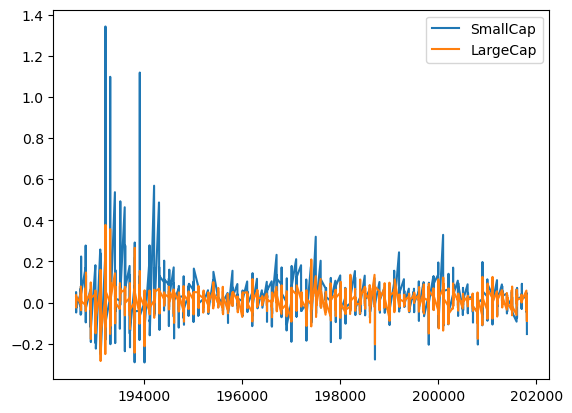

In [101]:
pdata.plot()

In [103]:
pdata.std()

SmallCap    0.106288
LargeCap    0.053900
dtype: float64

In [104]:
ann_vol = pdata.std()*np.sqrt(12)

In [105]:
ann_vol

SmallCap    0.368193
LargeCap    0.186716
dtype: float64

In [120]:
#compute the returns per month for each of the stock portfolios

#gets the number of months
n_months = pdata.shape[0]

#gets the total returns over the entire period
returns_per_mo = (pdata+1).prod()**(1/n_months) - 1

In [121]:
returns_per_mo

SmallCap    0.012986
LargeCap    0.007423
dtype: float64

In [124]:
ann_return = (returns_per_mo+1)**12-1

In [125]:
ann_return

SmallCap    0.167463
LargeCap    0.092810
dtype: float64

In [126]:
ann_return / ann_vol

SmallCap    0.454825
LargeCap    0.497063
dtype: float64

In [128]:
#calculate sharpe ratio
risk_fr = 0.03
excess_return = ann_return - risk_fr

In [129]:
excess_return

SmallCap    0.137463
LargeCap    0.062810
dtype: float64

In [130]:
sharpe_ratio = excess_return / ann_vol

In [131]:
sharpe_ratio

SmallCap    0.373346
LargeCap    0.336392
dtype: float64

In [133]:
pdata

SmallCap  LargeCap
192607   -0.0145    0.0329
192608    0.0512    0.0370
192609    0.0093    0.0067
192610   -0.0484   -0.0243
192611   -0.0078    0.0270
...          ...       ...
201808    0.0241    0.0234
201809   -0.0168    0.0087
201810   -0.1002   -0.0657
201811   -0.0365    0.0253
201812   -0.1531   -0.0890

[1110 rows x 2 columns]

In [ ]:
#compute for smallest 20% vs largest 20% of stocks